<a href="https://colab.research.google.com/github/FlorP1nk/Cac-2024-Big-Data/blob/main/Colab_c24009_Grupo_01_TP_P2_Anal%C3%ADtica_auditor%C3%ADa_CMM_Paraguay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

















**TRABAJO PRÁCTICO PARTE 2 - BIG DATA/ DATA ANALYTICS - C24009 Equipo 1-09**


*   *Degiorgis María Ayelén*
*   *Degiorgis María Sol*
*   *Zerbi María Florencia*




**1) Importación de Librerías y datasets**

*a) Importación de Librerías*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

*b) Importación de Datasets*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/TP EQUIPO 1-09 c24009/TP parte 2')

In [ ]:
# Importar el dataset distributors_profiles
df_distributors_profiles = pd.read_csv('/content/drive/MyDrive/TP EQUIPO 1-09 c24009/TP parte 2/Google Sheets_ c24009 - Grupo 01- TP P2 -distributors_profiles.csv', thousands = '.')

# Importar el dataset exports_to_Paraguay
df_exports_to_Paraguay = pd.read_csv('/content/drive/MyDrive/TP EQUIPO 1-09 c24009/TP parte 2/Google Sheets_ c24009 - Grupo 01- TP P2 -exports_to_Paraguay.csv', thousands = '.')

# Importar el dataset locations_profiles
df_locations_profiles = pd.read_csv('/content/drive/MyDrive/TP EQUIPO 1-09 c24009/TP parte 2/Google Sheets_ c24009 - Grupo 01- TP P2 -locations_profiles.csv', thousands = '.')

# Importar el dataset sales_in_Paraguay
df_sales_in_Paraguay = pd.read_csv('/content/drive/MyDrive/TP EQUIPO 1-09 c24009/TP parte 2/Google Sheets_ c24009 - Grupo 01- TP P2 -sales_in_Paraguay.csv', thousands = '.')

**2) Inspección preliminar y limpieza de Datasets**

*a) distributors_profiles*

In [ ]:
# Inspección: Cantidad de filas y columnas y tipo de datos:
print("\nChequeos básicos para el dataset de información de productos:")
print("Número de filas y columnas:", df_distributors_profiles.shape)
print("\nPrimeras filas del dataset:")
print(df_distributors_profiles.head())
print("\nTipos de datos de cada columna:")
print(df_distributors_profiles.dtypes)

# Detección y eliminación de datos faltantes:
print("\nValores faltantes por columna:")
print(df_distributors_profiles.isnull().sum())

print("\nEliminación de datos faltantes:")
print(df_distributors_profiles.dropna().isnull().count())

# Detección y eliminación de datos duplicados:
print("\nValores duplicados:")
print(df_distributors_profiles.duplicated().sum())

print("\nEliminación de datos duplicados:")
print(df_distributors_profiles.drop_duplicates().count())

# Detección y eliminación de filas innecesarias:
df_distributors_profiles.drop(df_distributors_profiles[df_distributors_profiles['id'] == "electrowelde"].index, inplace=True)
df_distributors_profiles.drop(df_distributors_profiles[df_distributors_profiles['id'] == 44].index, inplace=True)

# Columnas relevantes:
print("\nColumnas relevantes:")
columnas_relevantes_distributors_profiles = ['id', 'distributor activities']
df_distributors_profiles_filtrado = df_distributors_profiles[columnas_relevantes_distributors_profiles]
print(df_distributors_profiles_filtrado.head())

# Inspección: Cantidad de filas y columnas post tratamiento:
print("\nNuevo número de filas y columnas:", df_distributors_profiles_filtrado.shape)


Chequeos básicos para el dataset de información de productos:
Número de filas y columnas: (46, 4)

Primeras filas del dataset:
       id        distributor  \
0   565.0    Abernathy-Hayes   
1  1384.0     Balistreri LLC   
2  1183.0  Brekke-Stiedemann   
3  1526.0        Collins LLC   
4    29.0      Cummings-Ward   

                              distributor activities  \
0  construction materials import/distribution, ir...   
1  construction materials import/distribution, si...   
2         construction materials import/distribution   
3         construction materials import/distribution   
4  construction materials import/distribution, ir...   

   years in the construction market  
0                                15  
1                                22  
2                                13  
3                                12  
4                                23  

Tipos de datos de cada columna:
id                                  float64
distributor                          

*b) exports_to_Paraguay*

In [ ]:
# Inspección: Cantidad de filas y columnas y tipo de datos:
print("\nChequeos básicos para el dataset de información de productos:")
print("Número de filas y columnas:", df_exports_to_Paraguay.shape)
print("\nPrimeras filas del dataset:")
print(df_exports_to_Paraguay.head())
print("\nTipos de datos de cada columna:")
print(df_exports_to_Paraguay.dtypes)

# Detección y eliminación de datos faltantes:
print("\nValores faltantes por columna:")
print(df_exports_to_Paraguay.isnull().sum())

print("\nEliminación de datos faltantes:")
print(df_exports_to_Paraguay.dropna().isnull().sum())

# Detección y eliminación de datos duplicados:
print("\nValores duplicados:")
print(df_exports_to_Paraguay.duplicated().sum())

print("\nEliminación de datos duplicados:")
print(df_exports_to_Paraguay.drop_duplicates().count())

# Detección y eliminación de columnas sobrantes:
print("\nColumnas sobrantes:")
print(df_exports_to_Paraguay.drop("Unnamed: 13", axis=1, inplace=True))
print(df_exports_to_Paraguay.drop("Unnamed: 14", axis=1, inplace=True))
print(df_exports_to_Paraguay.drop("Columnas", axis=1, inplace=True))

# Columnas relevantes para el análisis según material:
print("\nColumnas relevantes para el análisis según material:")
columnas_relevantes_exports_to_Paraguay = ["Rubber", "Brass", "Vinyl", "Granite", "Stone", "Brick", "Aluminum", "Glass", "Plexiglass", "Steel", "Wood", "Plastic"]
df_exports_to_Paraguay_filtrado = df_exports_to_Paraguay[columnas_relevantes_exports_to_Paraguay]
print(df_exports_to_Paraguay_filtrado.head())

# Inspección: Cantidad de filas y columnas post tratamiento:
print("\nNuevo número de filas y columnas:", df_exports_to_Paraguay_filtrado.shape)


Chequeos básicos para el dataset de información de productos:
Número de filas y columnas: (46, 16)

Primeras filas del dataset:
   distributor          Rubber           Brass           Vinyl  \
0         1526  $22.431.099,00  $36.031.577,00  $31.118.167,00   
1         1553  $27.566.922,00  $21.996.538,00  $39.412.316,00   
2         1666  $37.577.095,00  $41.457.655,00  $31.467.967,00   
3          364  $36.012.730,00  $41.667.692,00  $22.837.073,00   
4          920  $43.416.417,00  $36.290.780,00  $23.679.738,00   

          Granite           Stone           Brick        Aluminum  \
0  $21.322.223,00  $35.382.848,00  $35.280.292,00  $32.362.235,00   
1  $25.681.987,00  $41.861.783,00  $22.408.742,00  $40.690.302,00   
2  $37.577.926,00  $35.845.106,00  $42.953.168,00  $33.817.289,00   
3  $29.288.200,00  $39.553.494,00  $33.513.588,00  $36.827.718,00   
4  $21.183.706,00  $25.210.622,00  $30.864.041,00  $41.173.207,00   

            Glass         Plexiglass           Steel       

*c) locations_profiles*

In [ ]:
# Inspección: Cantidad de filas y columnas y tipo de datos:
print("\nChequeos básicos para el dataset de información de productos:")
print("\n Número de filas y columnas:", df_locations_profiles.shape)
print("\nPrimeras filas del dataset:")
print(df_locations_profiles.head())
print("\nTipos de datos de cada columna:")
print(df_locations_profiles.dtypes)

# Detección y eliminación de datos faltantes:
print("\nValores faltantes por columna:")
print(df_locations_profiles.isnull().sum())

print("\nEliminación de datos faltantes:")
print(df_locations_profiles.dropna().isnull().sum())

# Detección y eliminación de datos duplicados:
print("\nValores duplicados:")
print(df_locations_profiles.duplicated().sum())

print("\nEliminación de datos duplicados:")
print(df_locations_profiles.drop_duplicates().count())

# Columnas relevantes:
print("\nColumnas relevantes:")
columnas_relevantes_locations_profiles = ["PYid", "department", "activities"]
df_locations_profiles_filtrado = df_locations_profiles[columnas_relevantes_locations_profiles]
print(df_locations_profiles_filtrado.head())

# Inspección: Cantidad de filas y columnas post tratamiento:
print("\nNuevo número de filas y columnas:", df_locations_profiles_filtrado.shape)


Chequeos básicos para el dataset de información de productos:

 Número de filas y columnas: (272, 5)

Primeras filas del dataset:
   PYid     id   location  department  \
0    71    NaN       Abaí     Caazapá   
1   224    NaN     Acahay   Paraguarí   
2   208    NaN    Alberdi    Ñeembucú   
3   168    NaN  Alto Verá      Itapúa   
4     7  409.0      Altos  Cordillera   

                                          activities  
0  food and beverage products manufacture, other ...  
1  food and beverage products manufacture, other ...  
2  food and beverage products manufacture, other ...  
3  food and beverage products manufacture, other ...  
4  agriculture, livestock, hunting and related, l...  

Tipos de datos de cada columna:
PYid            int64
id            float64
location       object
department     object
activities     object
dtype: object

Valores faltantes por columna:
PYid            0
id            261
location        8
department      1
activities      1
dtype: int64


*d) sales_in_Paraguay*

In [ ]:
# Inspección: Cantidad de filas y columnas y tipo de datos:
print("\nChequeos básicos para el dataset de información de productos:")
print("Número de filas y columnas:", df_sales_in_Paraguay.shape)
print("\nPrimeras filas del dataset:")
print(df_sales_in_Paraguay.head())
print("\nTipos de datos de cada columna:")
print(df_sales_in_Paraguay.dtypes)

# Detección y eliminación de datos faltantes:
print("\nValores faltantes por columna:")
print(df_sales_in_Paraguay.isnull().sum())

print("\nEliminación de datos faltantes:")
print(df_sales_in_Paraguay.dropna().isnull().sum())

# Detección y eliminación de datos duplicados:
print("\nValores duplicados:")
print(df_sales_in_Paraguay.duplicated().sum())

print("\nEliminación de datos duplicados:")
print(df_sales_in_Paraguay.drop_duplicates().count())

# Detección y eliminación de filas innecesarias:
df_sales_in_Paraguay.drop(df_sales_in_Paraguay[df_sales_in_Paraguay['distributor'] == "total"].index, inplace=True)
df_sales_in_Paraguay.drop(df_sales_in_Paraguay[df_sales_in_Paraguay['distributor']=="control"].index, inplace=True)
df_sales_in_Paraguay.drop(df_sales_in_Paraguay[df_sales_in_Paraguay['distributor']=="dif centavos"].index, inplace=True)

# Columnas relevantes para el análisis según material:
print("\nColumnas relevantes para el análisis según material:")
columnas_relevantes_sales_in_Paraguay = ["Rubber", "Brass", "Vinyl", "Granite", "Stone", "Brick", "Aluminum", "Glass", "Plexiglass", "Steel", "Wood", "Plastic"]
df_sales_in_Paraguay_filtrado = df_sales_in_Paraguay[columnas_relevantes_sales_in_Paraguay]
print(df_sales_in_Paraguay_filtrado.head())

# Inspección: Cantidad de filas y columnas post tratamiento:
print("\nNuevo número de filas y columnas:", df_sales_in_Paraguay_filtrado.shape)


Chequeos básicos para el dataset de información de productos:
Número de filas y columnas: (45, 13)

Primeras filas del dataset:
  distributor          Rubber           Brass           Vinyl         Granite  \
0         583  $54.510.203,61  $45.268.636,86  $51.579.748,25  $21.780.180,58   
1        1104  $32.438.788,20  $25.837.100,49  $36.603.264,50  $21.883.374,92   
2        1384  $21.780.180,58  $78.927.599,01  $25.837.100,49  $33.102.840,61   
3         379  $79.358.855,35  $90.185.311,22  $45.268.636,86  $54.510.203,61   
4        1599  $11.758.005,07  $21.780.180,58  $57.187.306,41   $9.945.371,16   

            Stone  Brick        Aluminum           Glass         Plexiglass  \
0  $26.576.776,52  $0,00  $55.872.547,77  $18.050.385,12    $178.927.599,01   
1   $1.473.437,08  $0,00  $46.239.695,30  $33.102.840,61     $35.563.624,11   
2  $51.579.748,25  $0,00  $21.883.374,92  $78.927.599,01      $1.346.769,34   
3  $59.358.855,35  $0,00  $79.358.855,35  $32.067.534,68     $53.172

**3) Modelado**


*a) Conversión de datos tipo object (moneda) a float en df_sales_in_Paraguay_filtrado*

In [ ]:
# Reemplazo de símbolos "$" y "." por espacios, y "," por puntos, para poder cambiar tipo de datos a flotante
df_sales_in_Paraguay_filtrado2 = df_sales_in_Paraguay_filtrado.replace('[\$.]', '', regex=True).replace('[\,]', '.', regex=True).astype(float)

# Eliminación de sistema de notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Impresión de tipo de datos cambiados
print(df_sales_in_Paraguay_filtrado2.dtypes)

# Impresión de las primeras filas del dataset con los tipos de datos cambiados
print(df_sales_in_Paraguay_filtrado2.head())

Rubber        float64
Brass         float64
Vinyl         float64
Granite       float64
Stone         float64
Brick         float64
Aluminum      float64
Glass         float64
Plexiglass    float64
Steel         float64
Wood          float64
Plastic       float64
dtype: object
       Rubber       Brass       Vinyl     Granite       Stone  Brick  \
0 54510203.61 45268636.86 51579748.25 21780180.58 26576776.52   0.00   
1 32438788.20 25837100.49 36603264.50 21883374.92  1473437.08   0.00   
2 21780180.58 78927599.01 25837100.49 33102840.61 51579748.25   0.00   
3 79358855.35 90185311.22 45268636.86 54510203.61 59358855.35   0.00   
4 11758005.07 21780180.58 57187306.41  9945371.16 32067534.68   0.00   

     Aluminum       Glass    Plexiglass   Steel        Wood   Plastic  
0 55872547.77 18050385.12  178927599.01 2788.80 54510203.61  20982.80  
1 46239695.30 33102840.61   35563624.11  599.01  9945371.16 187306.41  
2 21883374.92 78927599.01    1346769.34    0.00 36603264.50 300838.58  
3

*b) Conversión de datos tipo object (moneda) a float en df_exports_to_Paraguay_filtrado*

In [ ]:
# Reemplazo de símbolos "$" y "." por espacios, y "," por puntos, para poder cambiar tipo de datos a flotante
df_exports_to_Paraguay_filtrado2 = df_exports_to_Paraguay_filtrado.replace('[\$.]', '', regex=True).replace('[\,]', '.', regex=True).astype(float)

# Impresión de tipo de datos cambiados
print(df_exports_to_Paraguay_filtrado2.dtypes)

# Impresión de las primeras filas del dataset con los tipos de datos cambiados
print(df_exports_to_Paraguay_filtrado2.head())

Rubber        float64
Brass         float64
Vinyl         float64
Granite       float64
Stone         float64
Brick         float64
Aluminum      float64
Glass         float64
Plexiglass    float64
Steel         float64
Wood          float64
Plastic       float64
dtype: object
       Rubber       Brass       Vinyl     Granite       Stone       Brick  \
0 22431099.00 36031577.00 31118167.00 21322223.00 35382848.00 35280292.00   
1 27566922.00 21996538.00 39412316.00 25681987.00 41861783.00 22408742.00   
2 37577095.00 41457655.00 31467967.00 37577926.00 35845106.00 42953168.00   
3 36012730.00 41667692.00 22837073.00 29288200.00 39553494.00 33513588.00   
4 43416417.00 36290780.00 23679738.00 21183706.00 25210622.00 30864041.00   

     Aluminum       Glass    Plexiglass       Steel        Wood     Plastic  
0 32362235.00 36836190.00 9440858902.00 34676425.00 31862742.00 32588556.00  
1 40690302.00 37958885.00 8726744768.00 26472020.00 27403955.00 37881851.00  
2 33817289.00 41602183.00

*c) Concatenación de las tablas sales y exports según tipo de material*

In [ ]:
# Concatenación de DataFrames
ventas_vs_exportaciones = pd.concat([df_sales_in_Paraguay_filtrado2.sum(), df_exports_to_Paraguay_filtrado2.sum()], axis=1)

# Renombre de las columnas concatenadas
ventas_vs_exportaciones.columns = ["Ventas", "Exportaciones"]

print("\nVentas vs Exportaciones según material")
print(ventas_vs_exportaciones)

# Cálculo de ROI
ventas_vs_exportaciones = ventas_vs_exportaciones.assign(ROI_pesos = (ventas_vs_exportaciones["Ventas"] - ventas_vs_exportaciones["Exportaciones"])).assign(ROI_porcentaje = ((ventas_vs_exportaciones["Ventas"] - ventas_vs_exportaciones["Exportaciones"]) / ventas_vs_exportaciones["Exportaciones"]) * 100)

# Orden según ROI en modo Descendente
ventas_vs_exportaciones.sort_values(by="ROI_pesos", ascending=False, inplace=True)

print("\nDiferencia entre Ventas y Exportaciones y ROI calculado")
print(ventas_vs_exportaciones)


Ventas vs Exportaciones según material
                   Ventas  Exportaciones
Rubber      1680453941.29  1528360859.00
Brass       1840659380.95  1462033488.00
Vinyl       1912589120.56  1470176051.00
Granite     1845294550.27  1382172445.00
Stone       1651519395.63  1556913501.00
Brick           152658.00  5410307855.00
Aluminum    2163832570.85  1586030594.00
Glass       2173275882.75  1492973450.00
Plexiglass 25974040668.70 20856309083.00
Steel            58457.97 13724870030.00
Wood        1930565060.44  1462046434.00
Plastic     2047338174.32  1518409537.00

Diferencia entre Ventas y Exportaciones y ROI calculado
                   Ventas  Exportaciones       ROI_pesos  ROI_porcentaje
Plexiglass 25974040668.70 20856309083.00   5117731585.70           24.54
Glass       2173275882.75  1492973450.00    680302432.75           45.57
Aluminum    2163832570.85  1586030594.00    577801976.85           36.43
Plastic     2047338174.32  1518409537.00    528928637.32           34.83
Wood 

*d) Redondeo de valores de ventas_vs_exportaciones para ser mostrados en el gráfico de manera resumida*

In [ ]:
def round_to_millions(number):
  rounded_number = round(number / 1000000000, 2)
  return rounded_number

ventas_vs_exportaciones["Ventas"] = ventas_vs_exportaciones["Ventas"].apply(round_to_millions)
ventas_vs_exportaciones["Exportaciones"] = ventas_vs_exportaciones["Exportaciones"].apply(round_to_millions)
ventas_vs_exportaciones["ROI_pesos"] = ventas_vs_exportaciones["ROI_pesos"].apply(round_to_millions)

print(ventas_vs_exportaciones)


            Ventas  Exportaciones  ROI_pesos  ROI_porcentaje
Plexiglass   25.97          20.86       5.12           24.54
Glass         2.17           1.49       0.68           45.57
Aluminum      2.16           1.59       0.58           36.43
Plastic       2.05           1.52       0.53           34.83
Wood          1.93           1.46       0.47           32.05
Granite       1.85           1.38       0.46           33.51
Vinyl         1.91           1.47       0.44           30.09
Brass         1.84           1.46       0.38           25.90
Rubber        1.68           1.53       0.15            9.95
Stone         1.65           1.56       0.09            6.08
Brick         0.00           5.41      -5.41         -100.00
Steel         0.00          13.72     -13.72         -100.00


**4) Gráficos**

*a) Ventas vs Exportaciones según material*

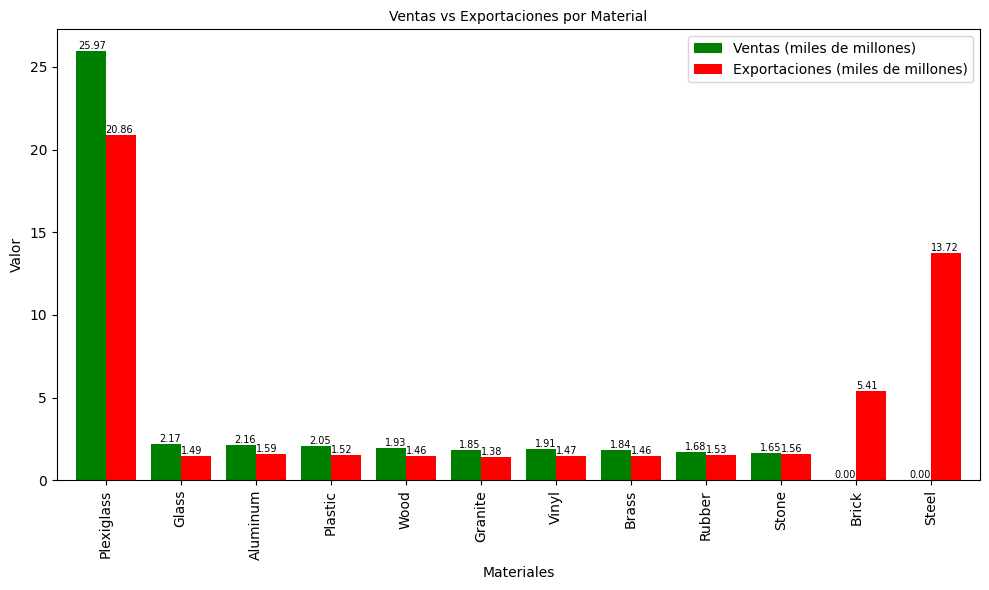

In [ ]:
# Creación del gráfico de barras
subset = ["Ventas", "Exportaciones"]
ventas_vs_exportaciones[subset].plot(kind='bar', stacked=False, figsize=(10, 6), width=0.8, color=["Green", "Red"])

# Título del gráfico
plt.title("Ventas vs Exportaciones por Material", fontsize=10)

# Título de los ejes
plt.xlabel("Materiales", fontsize=10)
plt.ylabel("Valor", fontsize=10)

# Etiquetas de valores
for i, val in enumerate(ventas_vs_exportaciones["Ventas"]):
    plt.text(i, val, f"{val:.2f}", ha="right", va="bottom", fontsize=7)
for i, val in enumerate(ventas_vs_exportaciones["Exportaciones"]):
    plt.text(i, val, f"{val:.2f}", ha="left", va="bottom", fontsize=7)

# Configuración del gráfico
plt.legend(["Ventas (miles de millones)", "Exportaciones (miles de millones)"], fontsize=10)
plt.tight_layout()
plt.xticks(rotation=90)

# Impresión del gráfico
plt.show()

*b) ROI según material*

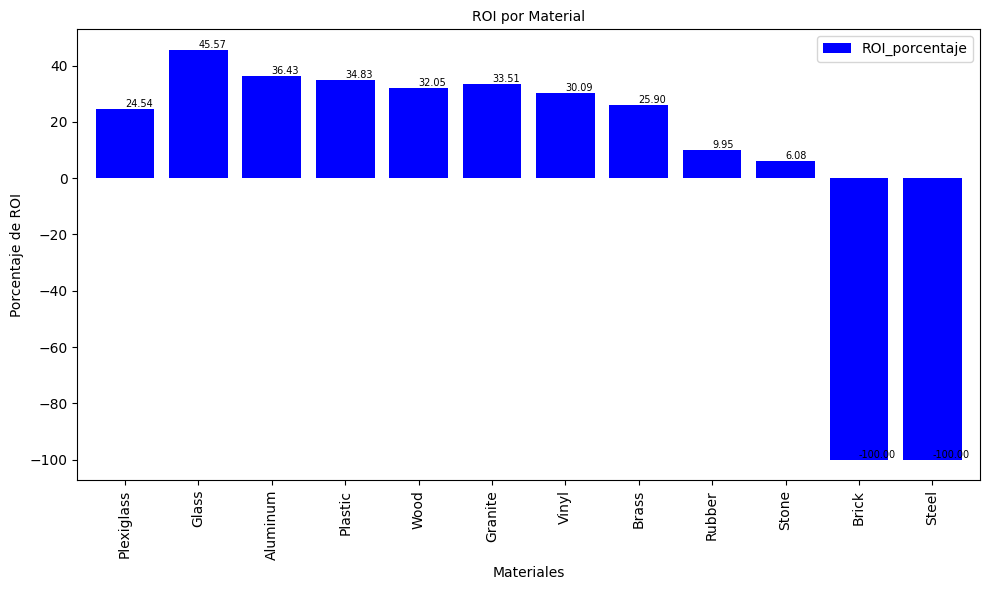

In [ ]:
# Creación del gráfico de barras
subset = ["ROI_porcentaje"]
ventas_vs_exportaciones[subset].plot(kind='bar', stacked=False, figsize=(10, 6), width=0.8, color=["Blue"])

# Título del gráfico
plt.title("ROI por Material", fontsize=10)

# Título de los ejes
plt.xlabel("Materiales", fontsize=10)
plt.ylabel("Porcentaje de ROI", fontsize=10)

# Etiquetas de valores
for i, val in enumerate(ventas_vs_exportaciones["ROI_porcentaje"]):
    plt.text(i, val, f"{val:.2f}", ha="left", va="bottom", fontsize=7)

# Configuración del gráfico
plt.legend(fontsize=10)
plt.tight_layout()
plt.xticks(rotation=90)

# Impresión del gráfico
plt.show()

**5) Conclusión**

Luego del análisis realizado con la documentación recibida, datos comerciales de Ventas e Importaciones de Paraguay (Exportaciones de CMM), podemos observar que los productos Ladrillo **(Brick)** y Acero **(Steel)**, tuvieron tasa de retorno de inversión (ROI) negativa.


Gracias a la información adicional proporcionada por nuestro equipo de recolección de datos, podemos confirmar las principales actividades económicas en ciudades donde existen distribuidores de la Cía, a fin de que puedan **mejorar la estrategia comercial**.

Las ciudades y sus principales actividades relacionadas con el negocio, son las siguientes:


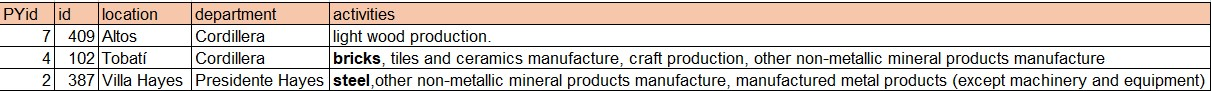


Recomendamos también analizar Ventas e Importaciones por Distribuidor, ya que pudieran existir resultados significativos que no se llegan a observar con el detalle cerrado por Producto.


Siendo los principales Distribuidores con ROI negativo:



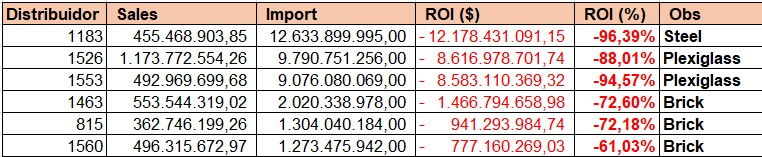




Saluda atte.




**TRABAJO PRÁCTICO PARTE 2 - BIG DATA/ DATA ANALYTICS - C24009 Equipo 1-09**


*   *Degiorgis María Ayelén*
*   *Degiorgis María Sol*
*   *Zerbi María Florencia*
